# Building an MTCollection

The first step to analyzing a set of transfer functions is to load them into an `MTCollection` which is just a wrapper around an `MTH5` file.  The advantage to doing this is that you only have to do this once from the various transfer functions that you have, which might include various flavors of EDI, EMTFXML, J-files, Z-files, AVG-files, etc.  The other advantage is that now you have a database to work with: a single file where data is readily accessible vs. multiple ASCII files that need to be read in each time you want to do something.  

Using the class `MT` any<a name="fn1"></a>[<sup>[1]</sup>](#fn1) transfer function can be read into a generic transfer function container `MT`.  If you want to adjust `survey.id` or other metadata attributes you can do it from the `MT` object.  

<a name="fn1"></a>1. [^](#fn1) It works 100% of the time 50% of the time.  Most transfer function files are supported but if you find one is not raise an [issue](https://github.com/MTgeophysics/mtpy/issues)

## Test Data

Test data can be found at [mtpy-data](https://github.com/MTgeophysics/mtpy_data). Installation instructions are included in README.

In [1]:
from mtpy_data import GRID_LIST, PROFILE_LIST

## 1. Initiate MTCollection

First initiate an `MTCollection`, here we will save to our current working directory.

In [2]:
from pathlib import Path
from mtpy import MT, MTCollection

2023-04-14 11:48:00,318 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log


In [3]:
mtc = MTCollection()

In [4]:
mtc.open_collection(Path().cwd().joinpath("test_mt_collection.h5"))

## 2. Load Transfer Functions

Step one is locating all the transfer function files you want to read in.  Here we will read in a couple different folders. If you have a couple different sets of data from different surveys, the MTCollection will store each in a survey group named by the `MT.survey_metadata.id`. However, this isn't a common attribute in EDI files, so if you want to separate them out add the correct survey ID.

<div class="alert alert-block alert-info">
<b>Note:</b> Loading transfer functions into an MTCollection can take some time so if you have over 100 be patient.  But you only have to do this once.
</div>

### 2a. Load Profile Data
The profile data does not have a `survey.id` in the EDI files so we will add one.

In [5]:
%%time
for fn in PROFILE_LIST:
    mt_object = MT()
    mt_object.read_tf_file(fn)
    mt_object.survey_metadata.id = "profile"
    mtc.add_tf(mt_object)

2023-04-14 11:48:00,683 [line 1056] mth5.mth5.MTH5.get_survey - WARNING: /Experiment/Surveys/profile does not exist, check survey_list for existing names.


Wall time: 5.92 s


### 2b. Load Grid Data
The grid data also does not have a `survey.id` so we will add one.

In [6]:
%%time
for fn in GRID_LIST:
    mt_object = MT()
    mt_object.read_tf_file(fn)
    mt_object.survey_metadata.id = "grid"
    mtc.add_tf(mt_object)

2023-04-14 11:48:06,605 [line 1056] mth5.mth5.MTH5.get_survey - WARNING: /Experiment/Surveys/grid does not exist, check survey_list for existing names.


Wall time: 42.5 s


## 3. Working and Master Dataframes

`MTCollection` includes a summary table of the transfer functions that it contains in the form of a `pandas.DataFrame`, this is the `MTCollection.master_dataframe`.  There is also a `MTCollection.working_dataframe` which is a subset of the `master_dataframe` that the user can specify.  This allows the MTCollection to be a catch-all for all your transfer functions and then when you only want to work with a small subset from a certain survey or geographic area you can query the `master_dataframe` to set the `working_dataframe`.

### 3a. Profile Working Dataframe

Here we will choose to work only with data that has a `survey.id = 'profile'`.

In [7]:
mtc.working_dataframe = mtc.master_dataframe.loc[mtc.master_dataframe.survey == "profile"]

In [8]:
mtc.working_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
59,15125A,profile,-22.370806,149.188639,200.0,15125A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
60,15126A,profile,-22.370639,149.193500,200.0,15126A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
61,15127A,profile,-22.371028,149.198417,201.0,15127A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
62,15128A,profile,-22.370861,149.203306,200.0,15128A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
63,15129A,profile,-22.371083,149.208083,202.0,15129A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
64,15130A,profile,-22.371222,149.212972,201.0,15130A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
65,16122A,profile,-22.325611,149.174361,210.0,16122A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
66,16123A,profile,-22.325556,149.179056,213.0,16123A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
67,16124A,profile,-22.325694,149.184472,212.0,16124A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
68,16125A,profile,-22.325750,149.189306,219.0,16125A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>


#### Plot station locations

Now that we have queried for only those stations in the 'profile' survey lets plot the station locations just for a sanity check. Looks like the 1600 line and 1500 line are different, so let's pick just the 1500 line. 

<div class="alert alert-block alert-danger">
<b>Warning:</b> Southern hemisphere locations have issues with contextily and not sure why.  Below is an example on how to change the provider.  See contextily [providers](https://contextily.readthedocs.io/en/latest/intro_guide.html#Providers) for more details. 
</div>

2023-04-14 11:48:49,490 [line 170] mtpy.imaging.plot_stations.PlotStations.plot - WARNING: Could not add base map because Tile URL resulted in a 404 error. Double-check your tile url:
https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/15/18469/29962


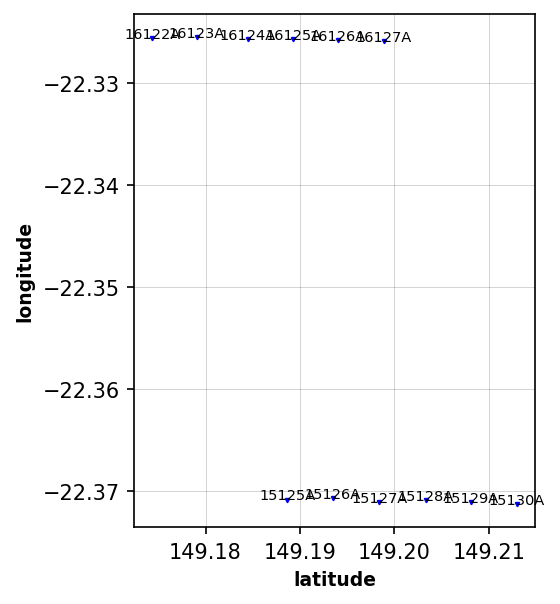

In [9]:
stations_plot = mtc.plot_stations()

In [10]:
import contextily as cx

2023-04-14T11:48:53 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/4b3c394c-cd7d-4454-bd1a-881ce612c33c/4b3c394c-cd7d-4454-bd1a-881ce612c33c.tif' not recognized as a supported file format."


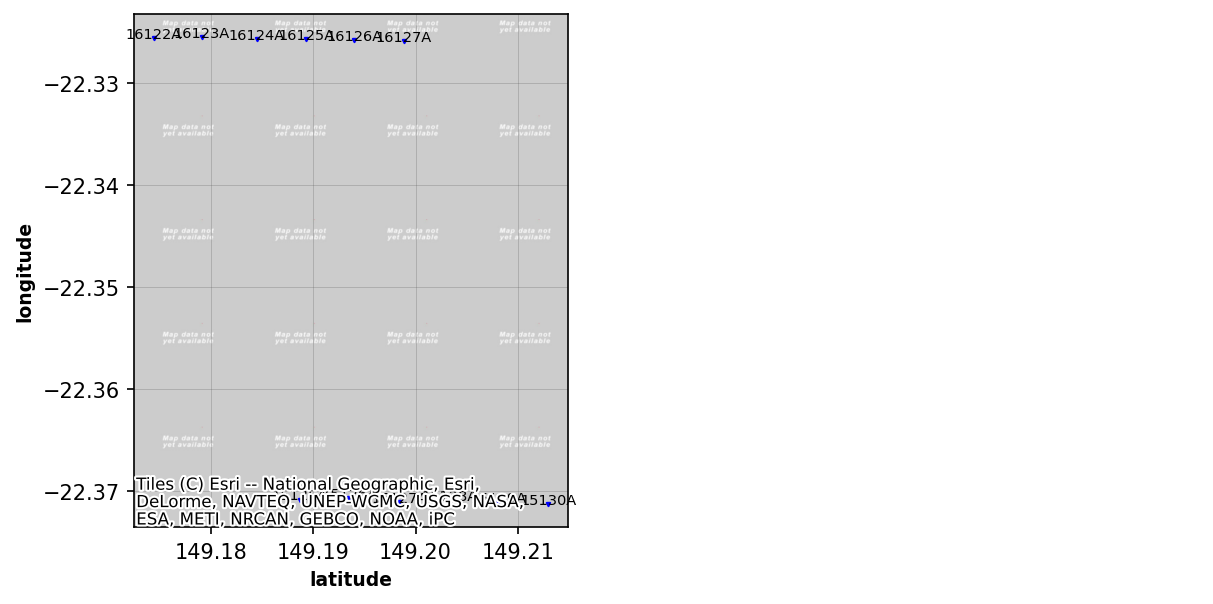

In [11]:
stations_plot.cx_source = cx.providers.Esri.NatGeoWorldMap
stations_plot.redraw_plot()

In [12]:
mtc.working_dataframe = mtc.working_dataframe.query('station.str.startswith("15")')

In [13]:
mtc.working_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
59,15125A,profile,-22.370806,149.188639,200.0,15125A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
60,15126A,profile,-22.370639,149.193500,200.0,15126A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
61,15127A,profile,-22.371028,149.198417,201.0,15127A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
62,15128A,profile,-22.370861,149.203306,200.0,15128A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
63,15129A,profile,-22.371083,149.208083,202.0,15129A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
64,15130A,profile,-22.371222,149.212972,201.0,15130A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>


C:\Users\jpeacock\Anaconda3\envs\em\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
2023-04-14 11:48:55,025 [line 170] mtpy.imaging.plot_stations.PlotStations.plot - WARNING: Could not add base map because Tile URL resulted in a 404 error. Double-check your tile url:
https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/20/591168/958827


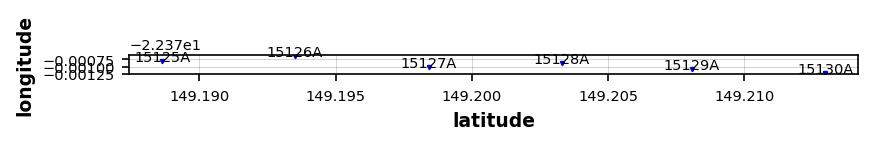

In [14]:
station_plot = mtc.plot_stations()

### 3b. Grid Working DataFrame

Now lets get only the stations in the 'grid' survey and plot them.

In [15]:
mtc.working_dataframe = mtc.master_dataframe.loc[mtc.master_dataframe.survey == "grid"]

In [16]:
mtc.working_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,gv100,grid,38.611381,-118.535261,1437.400,gv100,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,2048.000210,<HDF5 object reference>,<HDF5 object reference>
1,gv101,grid,38.594561,-118.351111,1540.550,gv101,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,2048.000210,<HDF5 object reference>,<HDF5 object reference>
2,gv102,grid,38.593692,-118.276822,1554.800,gv102,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,2048.000210,<HDF5 object reference>,<HDF5 object reference>
3,gv103,grid,38.585283,-118.202481,1543.900,gv103,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,1365.000061,<HDF5 object reference>,<HDF5 object reference>
4,gv104,grid,38.596456,-118.136547,1801.800,gv104,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,1365.000061,<HDF5 object reference>,<HDF5 object reference>
5,gv105,grid,38.594131,-118.071933,1901.600,gv105,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,1365.000061,<HDF5 object reference>,<HDF5 object reference>
6,gv106,grid,38.598842,-117.940803,1653.269,gv106,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,2048.000210,<HDF5 object reference>,<HDF5 object reference>
7,gv107,grid,38.612339,-117.882392,1753.700,gv107,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,2048.000210,<HDF5 object reference>,<HDF5 object reference>
8,gv108,grid,38.691575,-118.501819,1904.900,gv108,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,2048.000210,<HDF5 object reference>,<HDF5 object reference>
9,gv109,grid,38.721022,-118.421311,1769.400,gv109,millivolts_per_kilometer_per_nanotesla,True,True,False,0.001302,2048.000210,<HDF5 object reference>,<HDF5 object reference>


2023-04-14T11:48:58 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/ac017833-511f-42d6-a5f2-06c822326dd8/ac017833-511f-42d6-a5f2-06c822326dd8.tif' not recognized as a supported file format."


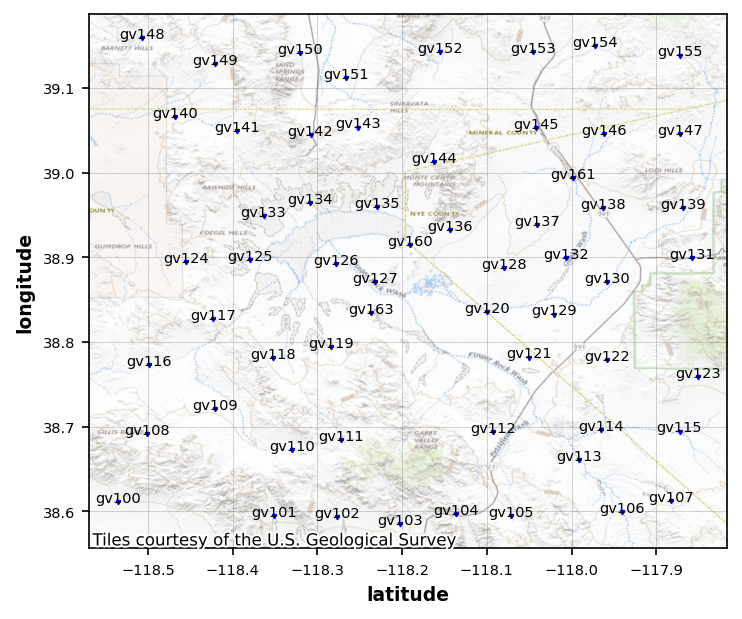

In [17]:
station_plot = mtc.plot_stations()

## 4. MTCollection vs MTData

`MTCollection` is the physical object where data are stored in memory and `MTData` is an extraction of the `MTCollection` that can be manipulated on RAM. Its designed this way so you don't have to keep accessing the MTH5 file and once loaded into RAM then `MTData` can manipulate the data in ways that may not want to be permentely stored.  

`MTCollection` does have plotting methods, as seen above, but can be slow for other plotting methods because it needs to load in the data for each plot.  This is sort of a bug and needs someone smarter to write better code, but for now convert the `working_dataframe` into an `MTData` object and from there plots, model inputs, and analysis can be done, which we will see in the `MTData` example notebook.

## 5. Close MTCollection

<div class="alert alert-block alert-danger">
<b>Important:</b> You need to close the MTCollection otherwise the file may get corrupted and you'll have to make the file all over again.  Note that once the file is closed the transfer functions are no longer available.  Therefore it is wise to convert to an MTData object.
</div>

In [18]:
mtc.close_collection()

2023-04-14 11:49:03,441 [line 755] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\examples\notebooks\test_mt_collection.h5
